In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
%matplotlib inline

In [2]:
def preview_dataset(dataset, num_images=8):
    """
    Displays a grid of images with their class labels.

    Args:
    - dataset: The dataset to preview, e.g., train_dataset.
    - num_images: Number of images to display (default is 8).
    """
    loader = DataLoader(dataset, batch_size=num_images, shuffle=True)
    data_iter = iter(loader)
    images, labels = next(data_iter)
    images = images * torch.tensor([0.229, 0.224, 0.225]).view(3, 1, 1)
    images = images + torch.tensor([0.485, 0.456, 0.406]).view(3, 1, 1)
    images = torch.clamp(images, 0, 1)

    # Plot images in a grid
    plt.figure(figsize=(12, 6))
    for i in range(num_images):
        ax = plt.subplot(2, num_images // 2, i + 1)
        np_img = images[i].numpy().transpose((1, 2, 0))  # Convert from Tensor to NumPy array
        plt.imshow(np_img)
        plt.title(dataset.classes[labels[i].item()])
        plt.axis("off")
    plt.show()

In [11]:
num_epochs = 50
batch_size = 1024
print(batch_size)
learning_rate = 0.001
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

1024


In [12]:
transform = transforms.Compose([
    transforms.Resize((112, 112)),  # ResNet standard input size
    transforms.ToTensor(),
    transforms.RandomInvert(0.8),
    transforms.RandomAdjustSharpness(0.8),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # ImageNet stats
])
train_dataset = datasets.ImageFolder(root="/home/hbdesk/labelstudio_convert/new_char_dset/", transform=transform)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

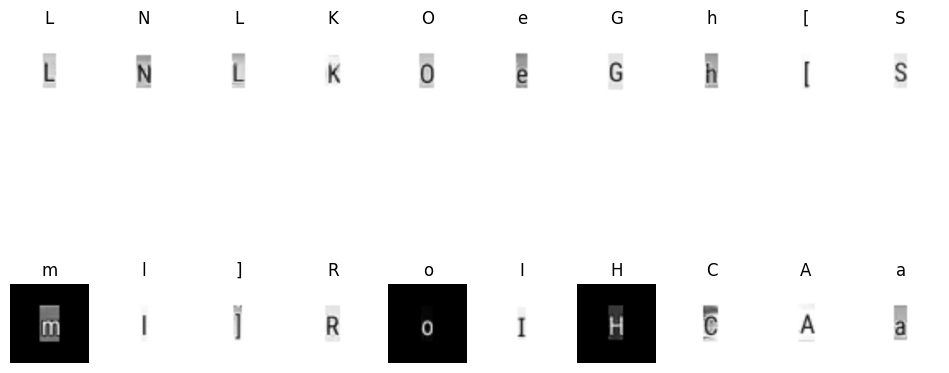

In [13]:
preview_dataset(train_dataset, 20)

In [14]:
print(train_dataset.classes)

['-', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '[', ']', '_', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [15]:
with open('./char_list_new.txt', 'w') as file:
    file.write('\n'.join(train_dataset.classes))

In [16]:
model = models.resnet34(pretrained=False)
num_classes = len(train_dataset.classes)  # automatically detect number of classes
model.fc = nn.Linear(model.fc.in_features, num_classes)  # Adjust final layer
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


In [17]:
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for images, labels in tqdm(train_loader):
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * images.size(0)

    # Calculate and print average loss for the epoch
    epoch_loss = running_loss / len(train_loader.dataset)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}")

# Save the model checkpoint
torch.save(model.state_dict(), "char_classifierv1.61_112.pth")
print("Training complete. Model saved.")

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.42it/s]


Epoch [1/50], Loss: 4.2484


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.46it/s]


Epoch [2/50], Loss: 3.5823


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.72it/s]


Epoch [3/50], Loss: 3.4785


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.30it/s]


Epoch [4/50], Loss: 3.0922


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.71it/s]


Epoch [5/50], Loss: 2.6885


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.43it/s]


Epoch [6/50], Loss: 2.3899


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.71it/s]


Epoch [7/50], Loss: 2.0671


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.70it/s]


Epoch [8/50], Loss: 1.7775


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.71it/s]


Epoch [9/50], Loss: 1.4395


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.68it/s]


Epoch [10/50], Loss: 1.1702


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.72it/s]


Epoch [11/50], Loss: 0.9231


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.44it/s]


Epoch [12/50], Loss: 0.7213


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.14it/s]


Epoch [13/50], Loss: 0.5203


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.67it/s]


Epoch [14/50], Loss: 0.3903


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.43it/s]


Epoch [15/50], Loss: 0.2984


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.33it/s]


Epoch [16/50], Loss: 0.2198


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.26it/s]


Epoch [17/50], Loss: 0.1855


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.68it/s]


Epoch [18/50], Loss: 0.1274


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.43it/s]


Epoch [19/50], Loss: 0.1107


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.29it/s]


Epoch [20/50], Loss: 0.0833


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.71it/s]


Epoch [21/50], Loss: 0.0726


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.28it/s]


Epoch [22/50], Loss: 0.0514


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.57it/s]


Epoch [23/50], Loss: 0.0398


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.37it/s]


Epoch [24/50], Loss: 0.0507


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.59it/s]


Epoch [25/50], Loss: 0.0780


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.58it/s]


Epoch [26/50], Loss: 0.0518


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.24it/s]


Epoch [27/50], Loss: 0.0524


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.61it/s]


Epoch [28/50], Loss: 0.0331


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.61it/s]


Epoch [29/50], Loss: 0.0306


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.58it/s]


Epoch [30/50], Loss: 0.0321


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.60it/s]


Epoch [31/50], Loss: 0.0214


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.60it/s]


Epoch [32/50], Loss: 0.0360


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.62it/s]


Epoch [33/50], Loss: 0.0259


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.57it/s]


Epoch [34/50], Loss: 0.0541


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.60it/s]


Epoch [35/50], Loss: 0.0437


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.60it/s]


Epoch [36/50], Loss: 0.0619


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.60it/s]


Epoch [37/50], Loss: 0.0417


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.38it/s]


Epoch [38/50], Loss: 0.0272


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.60it/s]


Epoch [39/50], Loss: 0.0249


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.37it/s]


Epoch [40/50], Loss: 0.0259


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.58it/s]


Epoch [41/50], Loss: 0.0220


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.60it/s]


Epoch [42/50], Loss: 0.0158


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.38it/s]


Epoch [43/50], Loss: 0.0205


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.59it/s]


Epoch [44/50], Loss: 0.0146


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.60it/s]


Epoch [45/50], Loss: 0.0140


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.45it/s]


Epoch [46/50], Loss: 0.0105


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.71it/s]


Epoch [47/50], Loss: 0.0134


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.71it/s]


Epoch [48/50], Loss: 0.0155


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.70it/s]


Epoch [49/50], Loss: 0.0078


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.69it/s]

Epoch [50/50], Loss: 0.0105
Training complete. Model saved.


In [10]:
from PIL import Image
import torch
from torchvision import transforms

# Define the image preprocessing transform
preprocess = transforms.Compose([
    transforms.Resize((112, 112)),  # ResNet standard input size
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # ImageNet stats
])

# Function to load the trained model
def load_model(model_path, num_classes):
    model = models.resnet34(pretrained=False)
    model.fc = nn.Linear(model.fc.in_features, num_classes)
    model.load_state_dict(torch.load(model_path, map_location="cpu"))
    model.eval()  # Set model to evaluation mode
    return model

# Inference function
def predict(image_path, model, class_names):
    """
    Perform inference on a single image.

    Args:
    - image_path (str): Path to the input image.
    - model (torch.nn.Module): Trained PyTorch model.
    - class_names (list of str): List of class names.

    Returns:
    - str: Predicted class name.
    """
    # Load and preprocess the image
    image = Image.open(image_path).convert("RGB")
    input_tensor = preprocess(image)
    # print(type(input_tensor))
    plt.imshow(input_tensor.view(-1, 224).cpu().numpy())
    plt.show()
    input_batch = input_tensor.unsqueeze(0)  # Create a mini-batch as expected by the model

    # Move the input to the same device as the model
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    input_batch = input_batch.to(device)
    model = model.to(device)

    # Perform inference
    with torch.no_grad():
        output = model(input_batch)
        _, predicted_idx = torch.max(output, 1)

    # Get the class label
    predicted_class = class_names[predicted_idx.item()]
    return predicted_class

# Load the model and class names
model_path = "./char_classifier.pth"
class_names = train_dataset.classes
model = load_model(model_path, num_classes=len(class_names))

# Perform inference on an example image
image_path = "/home/hbdesk/labelstudio_convert/chars/A/275eb429f17647cebf18bc336b709b65.png"  # Replace with your image path
predicted_class = predict(image_path, model, class_names)
print(f"Predicted class: {predicted_class}")

/tmp/ipykernel_230384/2057231199.py:16: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_location="cpu"))


FileNotFoundError: [Errno 2] No such file or directory: './char_classifier.pth'